In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
games = pd.read_csv('https://raw.githubusercontent.com/cabrau/curso-analise-visualizacao-dados-python/master/vgsales.csv')
games.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2213,2215,Bully,PS2,2006.0,Action,Take-Two Interactive,0.75,0.03,0.04,0.12,0.94
2879,2881,Spyro: Enter the Dragonfly,GC,2002.0,Platform,Universal Interactive,0.55,0.14,0.00,0.02,0.71
14765,14768,Mahou Sensei Negima! Kagai Jugyou ~Otome no Do...,PS2,2006.0,Adventure,Konami Digital Entertainment,0.00,0.00,0.03,0.00,0.03
3734,3736,Bratz: Rock Angelz,GBA,2004.0,Misc,THQ,0.39,0.14,0.00,0.01,0.54
6819,6821,Corvette,XB,2003.0,Racing,TDK Mediactive,0.18,0.05,0.00,0.01,0.24
2641,2643,Battle Stations,PS,1997.0,Strategy,Electronic Arts,0.43,0.29,0.00,0.05,0.78
1391,1393,Bakugan: Battle Brawlers,DS,2009.0,Action,Activision,1.27,0.02,0.00,0.09,1.39
3834,3836,NBA Live 08,X360,2007.0,Sports,Electronic Arts,0.47,0.00,0.00,0.04,0.52
15994,15997,S.Y.K: Shinsetsu Saiyuuki,PS2,2009.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
1476,1478,Metroid Prime 2: Echoes,GC,2004.0,Shooter,Nintendo,0.87,0.35,0.07,0.04,1.33


In [7]:
generos = games.groupby(by='Genre').sum()
generos

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,26441383,6531731.0,877.83,525.00,159.95,187.38,1751.18
Adventure,14831165,2562375.0,105.80,64.13,52.07,16.81,239.04
Fighting,6484242,1675871.0,223.59,101.32,87.35,36.68,448.91
Misc,14889052,3432412.0,410.24,215.98,107.76,75.32,809.96
Platform,6137545,1755347.0,447.05,201.63,130.77,51.59,831.37
Puzzle,5603136,1144994.0,123.78,50.78,57.31,12.55,244.95
Racing,9943933,2457934.0,359.42,238.39,56.69,77.27,732.04
Role-Playing,12032228,2952379.0,327.28,188.06,352.31,59.61,927.37
Shooter,9653872,2571588.0,582.60,313.27,38.28,102.69,1037.37


### Criando algumas verificações com o gráficos de pizza

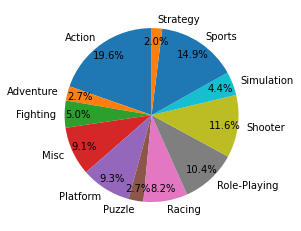

In [10]:
plt.pie(x=generos['Global_Sales'], labels = generos.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.show()

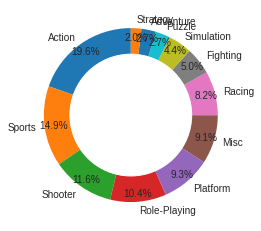

In [17]:
plt.pie(x=generos['Global_Sales'], labels = generos.index, autopct='%1.1f%%', startangle=90, pctdistance=0.90)
my_circle = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

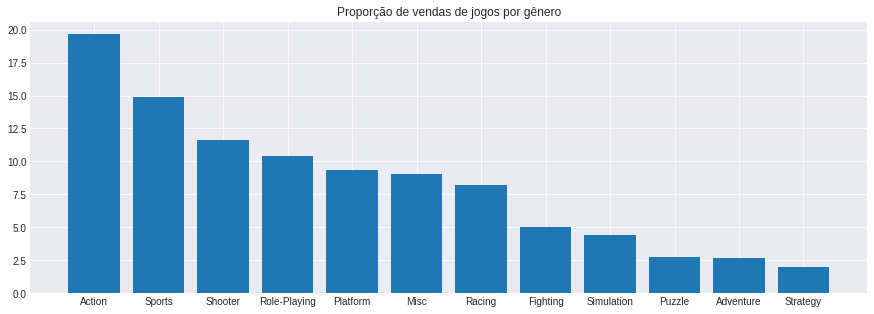

In [14]:
#Como o matplotlib não nos fornece uma função que gera gráfico de barras de porcetagem, teremos que fazer esse calculo

generos = generos.sort_values(by='Global_Sales', ascending=False)
porcetagens = generos['Global_Sales']*100/generos['Global_Sales'].sum()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5))
plt.bar(generos.index,porcetagens)
plt.title('Proporção de vendas de jogos por gênero')
plt.show()

### Gerando um gráfico de barras de porcetagem